# Самые простые индексы доверия к экономике

In [1]:
!ls data_simple_index_v2

hand_index_month.tsv
news_krizis_index_month.tsv
news_krizis_index_month_all.tsv
news_krizis_index_month_interfax.tsv
news_krizis_index_month_interfax_all.tsv
news_krizis_index_month_lenta.tsv
news_krizis_index_month_lenta_all.tsv
news_krizis_index_month_rbc.tsv
news_krizis_index_month_ria.tsv
news_krizis_index_month_ria_all.tsv
news_krizis_index_month_tass.tsv
news_krizis_index_month_tass_all.tsv
poisk_krizis_index_month.tsv
sentiment_krizis_index_day.tsv
sentiment_krizis_index_month.tsv


In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def min_max_scaler(df, col):
    mx = df[col].max()
    mn = df[col].min()
    df[col] = 100*(df[col] - mn)/(mx - mn)
    pass

# 1. Ручные индексы настроений и PMI

Собираю их [в этом](https://docs.google.com/spreadsheets/d/1Pbx48NTRXNc_8EH9GVsdeESoyl1Wg3OKdhwwaIrEBak/edit#gid=0) файле

* [Индекс финансовых настроений сбера](https://www.sberbank.ru/ru/about/analytics/mood)  (писал им на почту, перстали считать в начале 18-го)
* [Индекс предпренемательской уверенности](http://www.gks.ru/wps/wcm/connect/rosstat_main/rosstat/ru/statistics/enterprise/industrial/#) и его [описание](http://www.gks.ru/free_doc/new_site/metod/prom/met_pred-uver.htm) (росстат) 
* [PMI_proiz.](https://ru.investing.com/economic-calendar/russian-markit-manufacturing-pmi-1630)
* [PMI_uslug.](https://ru.investing.com/economic-calendar/russian-markit-services-pmi-1629), тоже [норм таблицы](https://tradingeconomics.com/calendar#)
* [Индекс потребительских настроений левада-центра](http://www.levada.ru/indikatory/sotsialno-ekonomicheskie-indikatory/indeks-potrebitelskikh-nastroenii/) строят [то раз в месяц, то раз в два.](https://www.levada.ru/indikatory/sotsialno-ekonomicheskie-indikatory/) Процедура такая же как в Сбере. Разрабатывали его вместе.

In [5]:
df_hand = pd.read_csv('data_simple_index_v2/hand_index_month.tsv',sep='\t',decimal=',')

df_hand['fielddate'] = df_hand['sber_date']
df_hand.drop(['sber_date', 'sber_IFN', 'levada_IPN', 'IPU_dob', 'IPU_energ'], axis=1, inplace=True)
df_hand.set_index('fielddate', inplace=True)

df_hand['IPU_obr'] = 100*df_hand['IPU_obr'].diff(12)

for col in df_hand.columns:
    min_max_scaler(df_hand, col)

df_hand.head()

,levada_IPN_fillna,PMI_proiz,PMI_uslug,IPU_obr
fielddate,,,,
2005-01,NaN,NaN,NaN,NaN
2005-02,NaN,NaN,NaN,NaN
2005-03,NaN,NaN,NaN,NaN
2005-04,NaN,NaN,NaN,NaN
2005-05,NaN,NaN,NaN,NaN


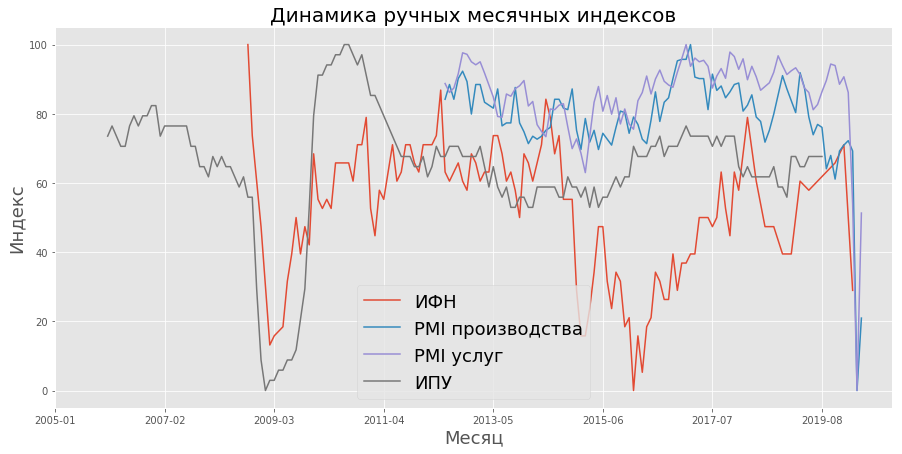

In [6]:
# df_hand = df_hand[(df_hand.index > '2012-01')&(df_hand.index < '2020-07')]

df_hand.plot(figsize=(15,7));
plt.title('Динамика ручных месячных индексов', fontsize=20);
plt.xlabel("Месяц", fontsize=18)
plt.ylabel("Индекс", fontsize=18)
plt.legend(['ИФН', 'PMI производства', 'PMI услуг', 'ИПУ'], fontsize=18);

# 2. Автоматические индексы 

In [7]:
df_poisk = pd.read_csv('data_simple_index_v2/poisk_krizis_index_month.tsv', sep='\t')
df_poisk.set_index('fielddate', inplace=True)

df_sent = pd.read_csv('data_simple_index_v2/sentiment_krizis_index_month.tsv', sep='\t')
df_sent.set_index('fielddate', inplace=True)

df_news = pd.read_csv('data_simple_index_v2/news_krizis_index_month.tsv', sep='\t')
df_news.set_index('fielddate', inplace=True)

df_index = df_poisk.join(df_sent).join(df_news).join(df_hand)
df_index.index = pd.to_datetime(df_index.index)
df_index.head()

,poiskInd_ind_corr,poiskInd_ind_pca,poiskInd_corr,poiskInd_pca,sentInd_beta_neg_pos,sentInd_beta_neg,sentInd_beta_pos,sentInd_diff,sentInd_beta_diff,newsInd_krizis_share,newsInd_krizis_corr,newsInd_krizis_neg,newsInd_krizis_neg_len,newsInd_krizis_diff,newsInd_krizis_diff_len,levada_IPN_fillna,PMI_proiz,PMI_uslug,IPU_obr
fielddate,,,,,,,,,,,,,,,,,,,
2004-01-01,15.679730,34.179246,1.932601,2.299494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.000000,0.004372,1.945144,3.809424,NaN,NaN,NaN,NaN,NaN,24.731849,20.871512,28.751433,31.089287,28.758503,34.770276,NaN,NaN,NaN,NaN
2004-03-01,19.770509,21.959464,4.277339,2.835021,NaN,NaN,NaN,NaN,NaN,5.241918,0.612129,3.289725,12.094990,3.083925,15.247898,NaN,NaN,NaN,NaN
2004-04-01,25.436467,24.391815,3.901864,1.686689,NaN,NaN,NaN,NaN,NaN,8.277492,34.124945,0.000000,7.667662,0.000000,10.593709,NaN,NaN,NaN,NaN
2004-05-01,9.381211,8.336980,0.273977,0.545531,NaN,NaN,NaN,NaN,NaN,9.878104,29.539187,26.968298,30.088417,27.119429,33.798114,NaN,NaN,NaN,NaN


# 3. Динамика

In [8]:
df_index.columns

Index(['poiskInd_ind_corr', 'poiskInd_ind_pca', 'poiskInd_corr',
       'poiskInd_pca', 'sentInd_beta_neg_pos', 'sentInd_beta_neg',
       'sentInd_beta_pos', 'sentInd_diff', 'sentInd_beta_diff',
       'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_neg',
       'newsInd_krizis_neg_len', 'newsInd_krizis_diff',
       'newsInd_krizis_diff_len', 'levada_IPN_fillna', 'PMI_proiz',
       'PMI_uslug', 'IPU_obr'],
      dtype='object')

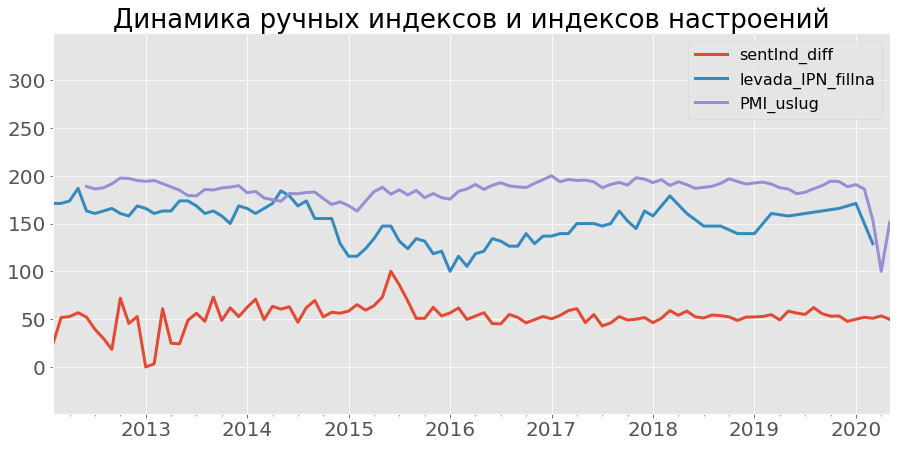

In [9]:
df_cur = df_index[(df_index.index > '2012-01')&(df_index.index < '2020-07')]

df_cur['levada_IPN_fillna'] = df_cur['levada_IPN_fillna'] + 100
df_cur['PMI_uslug'] = df_cur['PMI_uslug'] + 100


df_cur[[
#     'poiskInd_ind_corr', 
#     'poiskInd_ind_pca', 
##    'poiskInd_corr',
##    'poiskInd_pca', 

#     'sentInd_beta_neg',
    'sentInd_diff', 
##    'sentInd_beta_neg_pos', 
##    'sentInd_beta_pos', 
##    'sentInd_beta_diff',

#       'newsInd_krizis_share', 
#       'newsInd_krizis_corr',
#       'newsInd_krizis_diff_len', 
##     'newsInd_krizis_neg',
##     'newsInd_krizis_neg_len', 
##     'newsInd_krizis_diff',
    
    'levada_IPN_fillna', 
##    'PMI_proiz',
    'PMI_uslug', 
##    'IPU_obr'

         ]].plot(legend=True, figsize=(15,7), lw=3);

plt.title('Динамика ручных индексов и индексов настроений', fontsize=26);
plt.xlabel(" ", fontsize=18)
#plt.ylabel("Индекс", fontsize=18)
plt.ylim(-49,349)

plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.legend(
    # ['Индес поиска', 'Индекс поиска PCA', 'ИФН', 'PMI услуг'],
    # ['Байесовский индекс настроений', 'Частотный индекс настроений', 'ИФН', 'PMI услуг'],
    # ['Частотный индекс новостей', 'Частотный индекс новостей (corr)', 'Сентимент-индекс новостей', 'ИФН', 'PMI услуг'],
    #loc = 'lower right',
    fontsize=16);

# 4 Корреляция

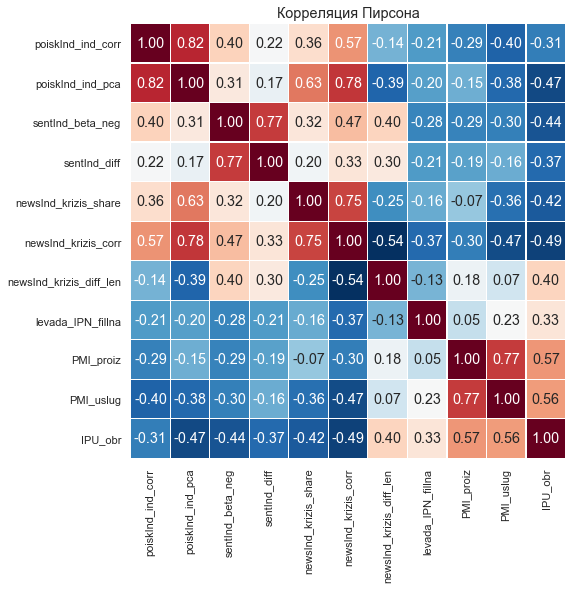

In [10]:
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(8, 8))

ind_col = [
     'poiskInd_ind_corr', 
     'poiskInd_ind_pca', 
##    'poiskInd_corr',
##    'poiskInd_pca', 

     'sentInd_beta_neg',
     'sentInd_diff', 
##    'sentInd_beta_neg_pos', 
##    'sentInd_beta_pos', 
##    'sentInd_beta_diff',

      'newsInd_krizis_share', 
      'newsInd_krizis_corr',
      'newsInd_krizis_diff_len', 
##     'newsInd_krizis_neg',
##     'newsInd_krizis_neg_len', 
##     'newsInd_krizis_diff',
    
    'levada_IPN_fillna', 
    'PMI_proiz',
    'PMI_uslug', 
    'IPU_obr'
]

sns.set(font_scale=1.2)
sns.heatmap(df_index[ind_col].corr(), square=True,
            cbar=False,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu_r")
plt.title('Корреляция Пирсона');

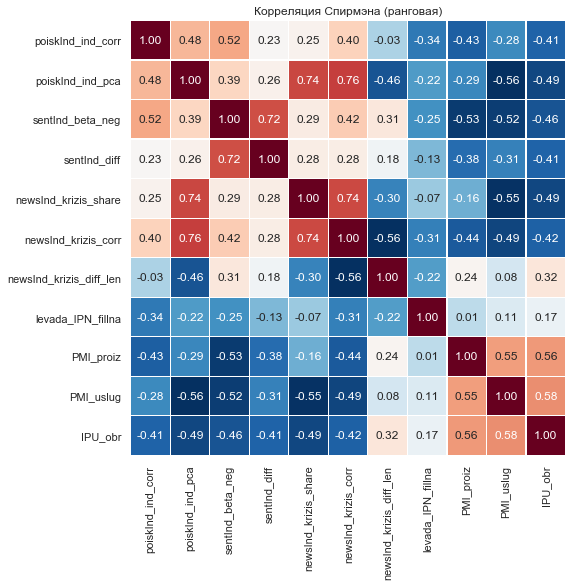

In [11]:
sns.set(font_scale=1)
plt.subplots(figsize=(8, 8))
sns.heatmap(df_index[ind_col].corr(method='spearman'), square=True,
            cbar=False,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu_r")
plt.title('Корреляция Спирмэна (ранговая)');

# 5 Макроданные

In [12]:
!ls data_macro

RTSI-dailyhistory-ru.csv   eur.xlsx
RTSI-monthlyhistory-ru.csv hse_stat.xlsx
data_macro_v2.csv          ipot.xls
dep_fiz.xls                usd.xlsx


Предобработка данных.

In [13]:
import re 

df_macro = pd.read_csv('data_macro/data_macro_v2.csv', sep='\t')

df_macro.set_index('fielddate', inplace=True)
df_macro.index = pd.to_datetime(df_macro.index)

# Для РТС и курса валют берём изменения в процентах
for col in ['RTS_LAST_VALUE', 'RTS_CLOSE_MEAN', 'RTS_TRADING_VOLUME_MEAN', 'USD', 'EUR']:
    df_macro[col + '_ret'] = df_macro[col].diff()
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_ret')

for col in ['DEP_FIZ', 'CPI_M_CHI', 'IP2_EA_M', 'UNEMPL_M_SH', 'WAG_M', 'WAG_C_M', 
 'RTRD_M_DIRI', 'RTRD_M', 'INVFC_M', 'IM_T_M', 'IPOT_CNT', 'IPOT_VOLUME', 'IPOT_DEBT']:
    df_macro[col + '_diff_12'] = df_macro[col].diff(12)
    df_macro.drop(col, axis=1, inplace=True)
    min_max_scaler(df_macro, col + '_diff_12')

df_macro = df_macro[df_macro.index >= '2004-01-01']
    
df_macro.head()

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
fielddate,,,,,,,,,,,,,,,,,,
2004-01-01,62.166656,75.457778,46.120500,NaN,NaN,NaN,84.749709,NaN,44.067797,68.019481,17.670409,70.081596,62.468258,25.477707,62.882096,NaN,NaN,NaN
2004-02-01,64.124509,73.828746,45.857870,40.394683,39.455871,NaN,84.749709,NaN,45.762712,73.322511,20.761178,71.260199,62.793296,27.115560,65.065502,NaN,NaN,NaN
2004-03-01,67.150867,76.549364,46.208978,42.400770,35.444258,NaN,84.866123,NaN,42.372881,73.011364,20.791479,72.620127,63.433215,27.716106,66.812227,NaN,NaN,NaN
2004-04-01,40.848102,72.264376,46.534955,43.240506,37.998826,NaN,84.982538,NaN,37.288136,70.481602,19.367301,73.254760,63.666836,27.388535,65.938865,NaN,NaN,NaN
2004-05-01,50.065090,55.455554,44.860345,44.112421,42.781322,NaN,84.943733,NaN,32.203390,69.074675,18.685514,73.526745,63.809040,29.135578,65.502183,NaN,NaN,NaN


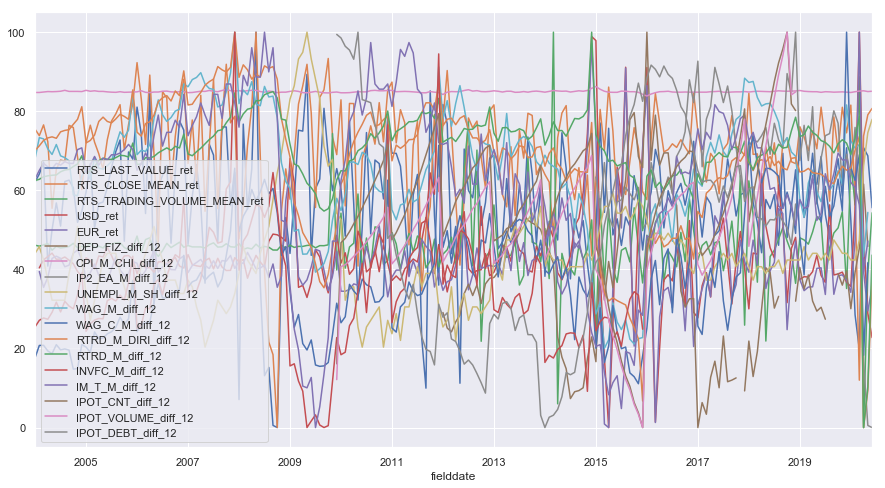

In [14]:
df_macro.plot(figsize=(15,8))

In [15]:
dff = df_index[ind_col].join(df_macro)
dff.head()

,poiskInd_ind_corr,poiskInd_ind_pca,sentInd_beta_neg,sentInd_diff,newsInd_krizis_share,newsInd_krizis_corr,newsInd_krizis_diff_len,levada_IPN_fillna,PMI_proiz,PMI_uslug,...,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
fielddate,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15.679730,34.179246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.067797,68.019481,17.670409,70.081596,62.468258,25.477707,62.882096,NaN,NaN,NaN
2004-02-01,0.000000,0.004372,NaN,NaN,24.731849,20.871512,34.770276,NaN,NaN,NaN,...,45.762712,73.322511,20.761178,71.260199,62.793296,27.115560,65.065502,NaN,NaN,NaN
2004-03-01,19.770509,21.959464,NaN,NaN,5.241918,0.612129,15.247898,NaN,NaN,NaN,...,42.372881,73.011364,20.791479,72.620127,63.433215,27.716106,66.812227,NaN,NaN,NaN
2004-04-01,25.436467,24.391815,NaN,NaN,8.277492,34.124945,10.593709,NaN,NaN,NaN,...,37.288136,70.481602,19.367301,73.254760,63.666836,27.388535,65.938865,NaN,NaN,NaN
2004-05-01,9.381211,8.336980,NaN,NaN,9.878104,29.539187,33.798114,NaN,NaN,NaN,...,32.203390,69.074675,18.685514,73.526745,63.809040,29.135578,65.502183,NaN,NaN,NaN


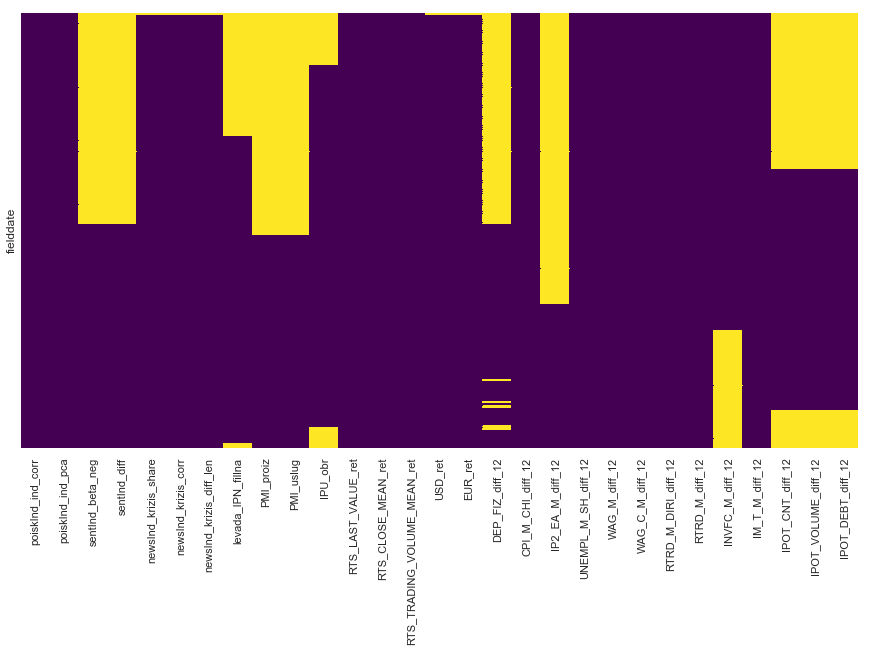

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(dff.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [17]:
100*(dff.isnull().sum()/dff.shape[0])

poiskInd_ind_corr               0.000000
poiskInd_ind_pca                0.000000
sentInd_beta_neg               48.730964
sentInd_diff                   48.730964
newsInd_krizis_share            0.507614
newsInd_krizis_corr             0.507614
newsInd_krizis_diff_len         0.507614
levada_IPN_fillna              29.441624
PMI_proiz                      51.269036
PMI_uslug                      51.269036
IPU_obr                        16.751269
RTS_LAST_VALUE_ret              0.000000
RTS_CLOSE_MEAN_ret              0.000000
RTS_TRADING_VOLUME_MEAN_ret     0.000000
USD_ret                         0.507614
EUR_ret                         0.507614
DEP_FIZ_diff_12                51.269036
CPI_M_CHI_diff_12               0.000000
IP2_EA_M_diff_12               67.005076
UNEMPL_M_SH_diff_12             0.000000
WAG_M_diff_12                   0.000000
WAG_C_M_diff_12                 0.000000
RTRD_M_DIRI_diff_12             0.000000
RTRD_M_diff_12                  0.000000
INVFC_M_diff_12 

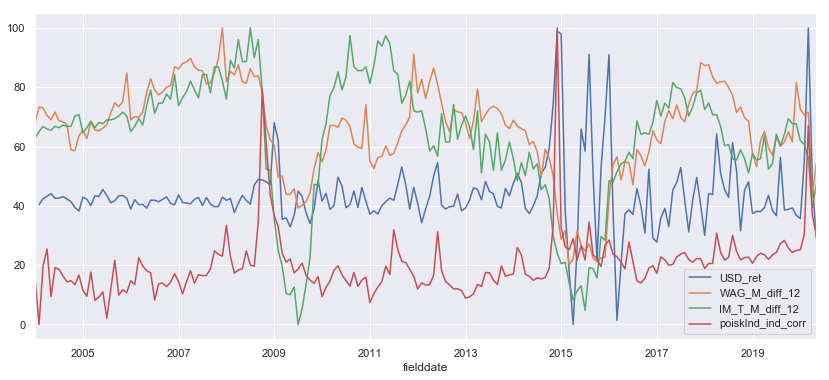

In [18]:
col = [
    'USD_ret',
    'WAG_M_diff_12', 
    'IM_T_M_diff_12',
    #'CPI_M_CHI_diff_12',
    #'UNEMPL_M_SH_diff_12',
    'poiskInd_ind_corr'
]

dff[col].plot(legend=True, figsize=(14,6));

# 6. Причинность по Грейнджеру

In [19]:
targets = [ 'RTS_LAST_VALUE_ret', 'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret', 'USD_ret', 'EUR_ret', 'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 'IP2_EA_M_diff_12', 'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 'WAG_C_M_diff_12', 'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12', 'INVFC_M_diff_12', 'IM_T_M_diff_12',
       'IPOT_CNT_diff_12', 'IPOT_VOLUME_diff_12', 'IPOT_DEBT_diff_12']

auto_ind = ['poiskInd_ind_corr', 'poiskInd_ind_pca', 
            'sentInd_beta_neg', 'sentInd_diff', 
            'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_diff_len']

hand_ind = ['levada_IPN_fillna', 'PMI_proiz', 'PMI_uslug', 'IPU_obr']

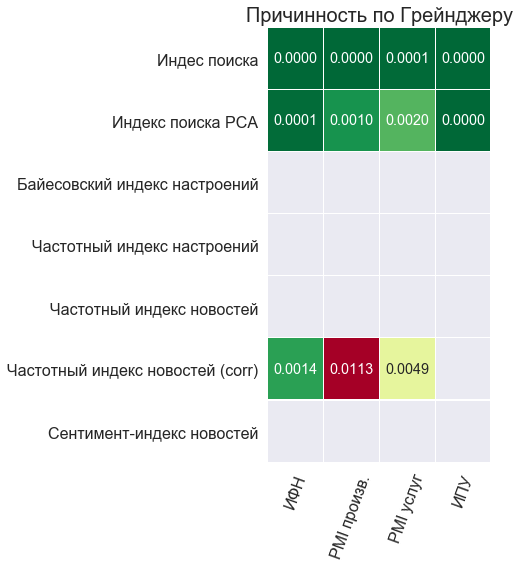

In [20]:
from statsmodels.tsa.api import VAR

# строки 
hand_ind = ['levada_IPN_fillna', 'PMI_proiz', 'PMI_uslug', 'IPU_obr']

# столбцы
auto_ind = ['poiskInd_ind_corr', 'poiskInd_ind_pca', 
            'sentInd_beta_neg', 'sentInd_diff', 
            'newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_diff_len']

G = np.zeros((len(hand_ind), len(auto_ind)))
GG = np.zeros((len(hand_ind), len(auto_ind)))

for i in range(len(hand_ind)):
    for j in range(len(auto_ind)):
        
        tg = hand_ind[i]
        cs = auto_ind[j]
        
        data = dff[[tg, cs]].dropna().reset_index(drop=True)
        data.columns = ['target', 'cause']
        
        model = VAR(data)
        results = model.fit(1)
        gr = results.test_causality('target', 'cause')
        G[i,j] = gr.pvalue

        # таргет на причину
        GG[i,j] = pt_c = results.pvalues['cause']['L1.target']
        # причина на таргет 
        # G[i,j] = results.pvalues['target']['L1.cause']
        # квадрат т-статистики = F статистике 
        
G[G >= 0.05] = None

sns.set(font_scale=1.2)
fig, axes = plt.subplots(figsize=(4,8))
chart = sns.heatmap(G.T, cbar=False, annot=True, 
            fmt=".4f", linewidths=0.1, cmap='RdYlGn_r');

chart.set_yticklabels(rotation=0, fontsize=16, labels=['Индес поиска', 'Индекс поиска PCA', 
                                           'Байесовский индекс настроений', 'Частотный индекс настроений', 
                                           'Частотный индекс новостей', 'Частотный индекс новостей (corr)', 
                                           'Сентимент-индекс новостей'])

chart.set_xticklabels(rotation=70, fontsize=16, labels=['ИФН', 'PMI произв.', 'PMI услуг', 'ИПУ'])
plt.title('Причинность по Грейнджеру', fontsize=20);

In [21]:
# %load_ext rpy2.ipython

In [22]:
# %%R -i data

# library(vars)
# library(tidyr)

# var <- VAR(data[c('target', 'cause')] %>% drop_na(), p = 1, type = "const")
# summary(var) #, vcov.=vcovHC(var))
#causality(var, cause = 'cause')$Granger #, vcov=vcovHC(var)

#x = data$target#[2:dim(data)[1]]
#y = data$cause#[1:(dim(data)[1]-1)]
#grangertest(y ~ x, order = 1, vcov=vcovHC(var))

In [23]:
# %%R -i data

# y = data$target[2:dim(data)[1]]
# x = data$cause[1:(dim(data)[1]-1)]

# model <- lm(y~x)
# summary(model)

# 7. Наукастинг

In [24]:
# !pip3 install --user scipy==1.2.0
import statsmodels.api as sm

get_ar1 = True
pvals = dict()
models = dict()

for target in targets + hand_ind:
    print(f'\nЗначимые модели для {target}:')
    ppp, mmm = [ ], [ ]
    for index in auto_ind + hand_ind:
        
        if target == index:
            ppp.append(-1)
            continue 
            
        df_cp = dff[[target, index]].dropna().copy()
        df_cp['constant'] = 1
        
        # брать ar(1) или нет 
        if get_ar1:
            df_cp[target + '_lag'] = df_cp[target].shift(1)
            df_cp = df_cp[1:]

        y = df_cp[target][1:]   

        y = df_cp[target].values
        X = df_cp.drop(target, axis=1).values
        features = list(df_cp.drop(target, axis=1).columns)
            
        
        model = sm.OLS(y, X).fit(cov_type='HC1') 
        pval = round(model.pvalues[0],2)
        if pval < 0.05:
            print(index, pval)
            mmm.append((index, model))
            
        ppp.append(pval)  
        
    pvals[target] = ppp
    models[target] = mmm


Значимые модели для RTS_LAST_VALUE_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd_krizis_corr 0.03
newsInd_krizis_diff_len 0.04

Значимые модели для RTS_CLOSE_MEAN_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd_krizis_share 0.03
newsInd_krizis_corr 0.03

Значимые модели для RTS_TRADING_VOLUME_MEAN_ret:
sentInd_diff 0.01
newsInd_krizis_diff_len 0.03
PMI_proiz 0.02

Значимые модели для USD_ret:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0

Значимые модели для EUR_ret:
poiskInd_ind_corr 0.01
poiskInd_ind_pca 0.02

Значимые модели для DEP_FIZ_diff_12:
newsInd_krizis_corr 0.03
PMI_uslug 0.03

Значимые модели для CPI_M_CHI_diff_12:

Значимые модели для IP2_EA_M_diff_12:
poiskInd_ind_corr 0.02
poiskInd_ind_pca 0.01
PMI_proiz 0.0
PMI_uslug 0.0

Значимые модели для UNEMPL_M_SH_diff_12:
poiskInd_ind_corr 0.02
poiskInd_ind_pca 0.01
newsInd_krizis_corr 0.0
PMI_proiz 0.0
PMI_uslug 0.0
IPU_obr 0.0

Значимые модели для WAG_M_diff_12:
poiskInd_ind_corr 0.0
poiskInd_ind_pca 0.0
newsInd

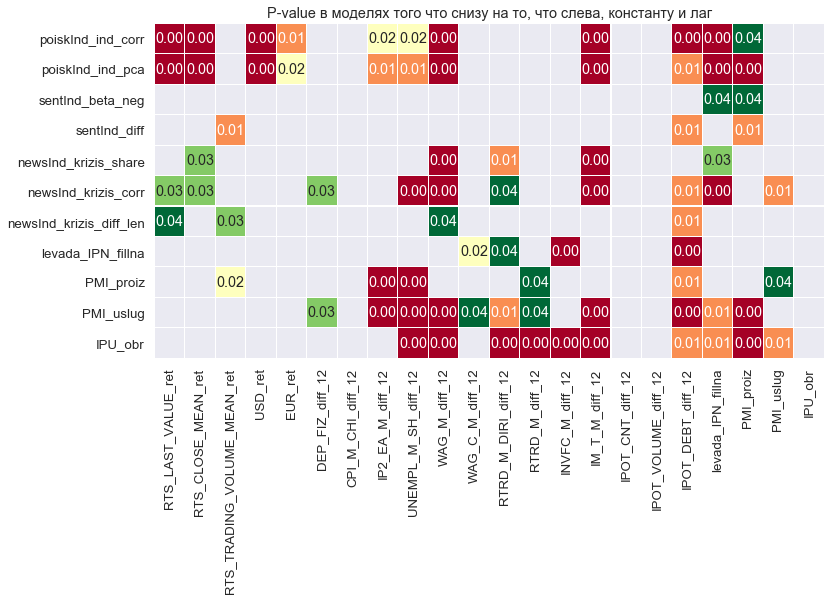

In [25]:
df_res = pd.DataFrame(pvals).T
df_res.columns = auto_ind + hand_ind
df_res = df_res.T

df_res[df_res >= 0.05] = None
df_res[df_res == -1] = None

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_res, cbar=False, square=True, annot=True, fmt=".2f", 
            linewidths=0.1, cmap='RdYlGn');
plt.title('P-value в моделях того что снизу на то, что слева, константу и лаг');

``pip install git+https://github.com/statsmodels/statsmodels.git --upgrade``

``pip install pmdarima``

In [79]:
import pmdarima as pm
from pmdarima import model_selection
from collections import defaultdict

def fit_arima(y, test_per=24, verbouse=False):

    y_train = y[:-test_per]
    y_test = y[-test_per:]

    # подбор модели только для таргета
    arima_model = pm.auto_arima(
        y_train,
        start_p=1, start_q=1,
        max_p=12, max_q=12, 
        m=12,
        start_P=0, 
        d=0, D=0,
        seasonal=False,
        #trace=True,
        error_action='ignore',  
        suppress_warnings=True, 
        stepwise=True, 
        n_fits=100,
        information_criterion='bic',
        #scoring='mae',
        #out_of_sample_size=test_per 
    )

    aic_noIndex = arima_model.aic()

    cv = model_selection.SlidingWindowForecastCV(window_size=y_train.size, step=1, h=1)
    predicts_noIndex = model_selection.cross_val_predict(
        arima_model,
        y,
        cv=cv,
        #verbose=2,
        averaging="mean"
    )
    
    if verbouse:
        print("AIC:", aic_noIndex)   
    
        plt.figure(figsize=(15,6))
        x_axis = np.arange(y.shape[0])
        n_test = predicts_noIndex.size

        plt.plot(x_axis[-(n_test + 10):], y[-(n_test + 10):], alpha=0.75, c='b', label='test', lw=2)
        plt.plot(x_axis[-n_test:], predicts_noIndex, alpha=0.75, c='r', label='no_index', lw=2)
        plt.title("Cross-validated wineind forecasts")
        plt.legend();
    
    return arima_model, predicts_noIndex, y[-test_per:]


def fit_arima_exo(y, x, test_per=32, verbouse=False):

    y_train, x_train = y[:-test_per], x[:-test_per]    
    y_test, x_test = y[-test_per:], x[-test_per:]

    # подбор модели c таргетом и экзогеном
    arima_Index_model = pm.auto_arima(
        y_train,
        exogenous=np.array([x_train]).T,
        start_p=1, start_q=1,
        max_p=12, max_q=12, 
        m=12,
        start_P=0, 
        d=0, D=0,
        seasonal=False,
        #trace=True,
        error_action='ignore',  
        suppress_warnings=True, 
        stepwise=True, 
        information_criterion='bic',
        n_fits=100
    )

    arima_Index_model.with_intercept = False
    arima_Index_model.fit(y_train, exogenous=np.array([x_train]).T)
    aic_Index = arima_Index_model.aic()

    cv = model_selection.SlidingWindowForecastCV(window_size=y_train.size, step=1, h=1)
    predicts_Index = model_selection.cross_val_predict(
        arima_Index_model,
        y,
        exogenous = np.array([np.ones_like(x), x]).T,
        cv=cv,
        #verbose=2,
        averaging="mean"
    )
    
    if verbouse:
        print("AIC:", aic_Index)   
    
        plt.figure(figsize=(15,6))
        x_axis = np.arange(y.shape[0])
        n_test = predicts_Index.size

        plt.plot(x_axis[-(n_test + 10):], y[-(n_test + 10):], alpha=0.75, c='b', label='test', lw=2)
        plt.plot(x_axis[-n_test:], predicts_Index, alpha=0.75, c='r', label='index', lw=2)
        plt.title("Cross-validated wineind forecasts")
        plt.legend();
        
    return arima_Index_model, predicts_Index, y[-test_per:]

In [27]:
targets_1 = targets + hand_ind
indexes_1 = auto_ind + hand_ind
    
models_arima = defaultdict(dict)
models_index = defaultdict(dict)

In [28]:
for i in range(len(targets_1)):
    target = targets_1[i]
    print(target)
    
    for j in range(len(indexes_1)):    
        index = indexes_1[j]
        print(index)

        df_cp = dff[[target, index]].dropna().copy()
        
        if target == index:
            continue
            
        y = df_cp[target].values
        x = df_cp[index].values
                
        md, pr, yt = fit_arima(y, test_per=int(0.3*(y.size) + 1))
        
        models_arima[(target,index)]['model'] = md
        models_arima[(target,index)]['predict'] = pr
        models_arima[(target,index)]['test'] = yt

        try:
            md, pr, yt = fit_arima_exo(y, x, test_per=int(0.3*(y.size) + 1))      
            models_index[(target,index)]['model'] = md
            models_index[(target,index)]['predict'] = pr
            models_index[(target,index)]['test'] = yt
        except:
            print('Ошибка', target, index)

RTS_LAST_VALUE_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_CLOSE_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_TRADING_VOLUME_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
USD_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
EUR_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
DEP_FIZ_diff_12
poiskInd_ind_corr
pois

__Насколько сильно какой из индексов в среднем уменьшает MAE за счёт добавления__ 

In [29]:
len(models_index)

237

In [33]:
result_arima = defaultdict(dict)
result_index = defaultdict(dict)

for k in models_index.keys():
    item = models_index[k]
    metric_index = np.mean(np.abs(item['test'] - item['predict']))
    #metric_index = np.sqrt(np.mean((item['test'] - item['predict'])**2))
    result_index[k[0]].update({k[1] : metric_index})
    
    jtem = models_arima[k]
    metric_arima = np.mean(np.abs(jtem['test'] - jtem['predict']))
    #metric_arima = np.sqrt(np.mean((jtem['test'] - jtem['predict'])**2))
    result_arima[k[0]].update({k[1] : metric_arima})

In [38]:
MMM = (pd.DataFrame(result_arima) - pd.DataFrame(result_index)).drop(['levada_IPN_fillna', 'PMI_proiz',
                                                                      'PMI_uslug', 'IPU_obr'], axis=1)
MMM

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
poiskInd_ind_corr,0.566453,0.757760,-0.089516,0.771147,0.389951,0.232894,-0.014323,-0.530136,0.035448,0.042843,0.015425,-0.353999,0.331268,0.388458,-0.065176,0.154610,0.169098,0.030507
poiskInd_ind_pca,0.751942,0.240560,-0.023043,1.568097,0.437300,0.251119,-0.013422,-0.155640,0.033995,0.042679,-0.005484,-0.361332,0.443918,0.407223,-0.029462,0.085415,0.109976,0.031257
sentInd_beta_neg,0.329674,0.263498,0.026232,0.274273,0.229362,0.064621,-0.001843,-0.176037,0.120009,-0.559161,-0.254066,-0.084952,-0.009124,0.480042,0.319977,0.004027,-0.009956,-0.268115
sentInd_diff,0.118266,0.197957,0.152571,0.133519,0.057228,0.146034,0.001090,-0.076978,0.045120,-0.152440,-0.084923,0.008162,0.004814,-0.788243,0.422133,0.010383,0.011264,-0.149947
newsInd_krizis_share,-0.061529,0.011881,-0.015280,1.061734,0.304049,0.494127,0.000257,0.629212,0.158536,0.111745,0.084182,-0.018684,0.037807,-0.080506,0.064558,-0.244086,-0.174894,-0.137892
newsInd_krizis_corr,-0.367397,-0.159211,-0.029577,0.699020,-0.005126,0.496403,-0.012050,-0.254344,0.019451,0.027981,0.006260,-0.118984,0.553402,0.095339,0.030981,0.237726,0.325174,-0.043486
newsInd_krizis_diff_len,-0.002435,-0.251463,0.035583,-0.081981,-0.074685,0.103661,-0.030954,-0.802769,0.020207,0.070365,-0.002278,-0.041299,0.033684,0.031811,-0.078233,-0.094120,-0.008208,-0.014544
levada_IPN_fillna,-0.046174,-0.079542,-0.017818,1.574668,0.129456,0.028115,0.000529,0.148706,0.095250,-0.035079,-0.307077,-0.017904,-0.003104,-1.290852,-0.040342,-0.094325,-0.057471,0.092832
PMI_proiz,-0.468678,-0.591335,-0.034725,-0.852992,0.164798,-1.759630,-0.004431,1.272544,-0.012601,1.013659,-0.502920,-0.045756,0.770077,-0.226919,0.405705,-0.273817,-0.278307,-0.052246
PMI_uslug,-1.048443,-0.772654,0.021927,-1.622660,-0.516813,-1.249274,-0.006869,1.691579,-0.120747,0.234729,-1.337380,-1.274073,-0.154683,-1.009826,NaN,0.018083,0.057916,-0.097563


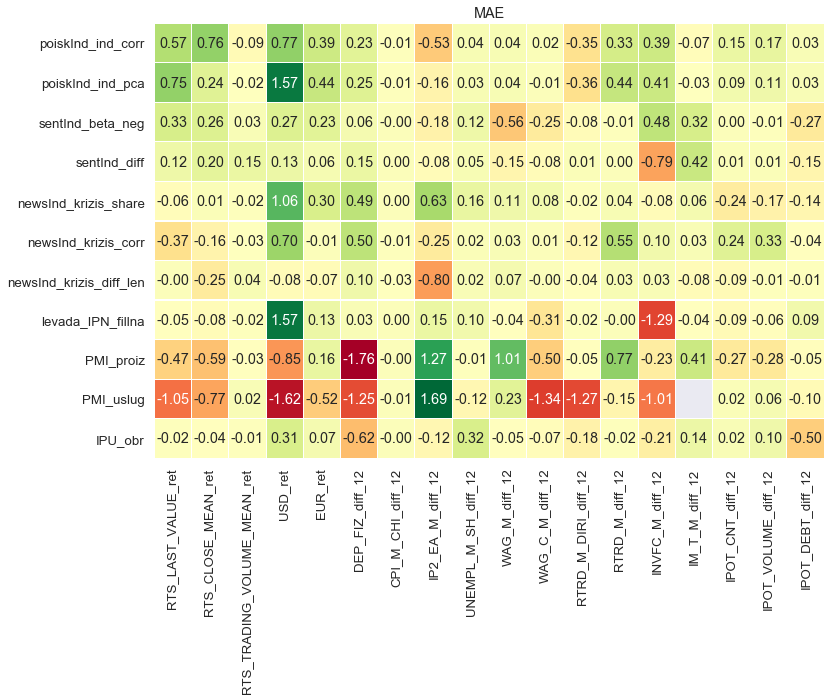

In [39]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
plt.title('MAE');

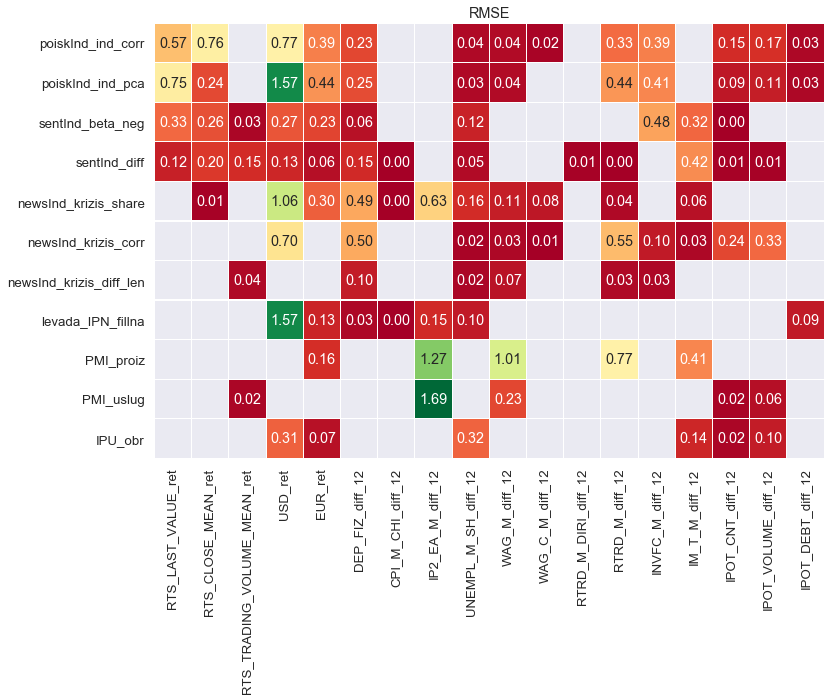

In [40]:
MMM_g = MMM.copy()
MMM_g[MMM_g < 0] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('RMSE');

In [41]:
np.nan_to_num(MMM_g).mean()

0.13195060856413063

In [36]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) # RMSE

poiskInd_ind_pca           0.410343
poiskInd_ind_corr          0.393598
newsInd_krizis_corr        0.128281
newsInd_krizis_share       0.103822
sentInd_beta_neg           0.084427
PMI_proiz                  0.011889
levada_IPN_fillna          0.007157
newsInd_krizis_diff_len    0.000868
sentInd_diff              -0.024029
IPU_obr                   -0.065477
PMI_uslug                 -1.114972
dtype: float64

In [42]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) # MAE

poiskInd_ind_pca           0.211950
poiskInd_ind_corr          0.157373
newsInd_krizis_share       0.123623
newsInd_krizis_corr        0.083420
sentInd_beta_neg           0.041581
levada_IPN_fillna          0.004437
sentInd_diff               0.003112
IPU_obr                   -0.049533
newsInd_krizis_diff_len   -0.065981
PMI_proiz                 -0.082087
PMI_uslug                 -0.399264
dtype: float64

# 8. Прогнозирование

In [43]:
models_indexF = defaultdict(dict)

In [44]:
for i in range(len(targets_1)):
    target = targets_1[i]
    print(target)
    
    for j in range(len(indexes_1)):
        index = indexes_1[j]
        print(index)
        df_cp = dff[[target, index]].dropna().copy()
        if target == index:
            continue
            
        x = df_cp[index].values[:-1]
        y = df_cp[target].values[1:]
        try:
            md, pr, yt = fit_arima_exo(y, x, test_per=int(0.3*(y.size) + 1))       
            models_indexF[(target,index)]['model'] = md
            models_indexF[(target,index)]['predict'] = pr
            models_indexF[(target,index)]['test'] = yt
        except:
            print('Ошибка', target, index)

RTS_LAST_VALUE_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_CLOSE_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
RTS_TRADING_VOLUME_MEAN_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
USD_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
EUR_ret
poiskInd_ind_corr
poiskInd_ind_pca
sentInd_beta_neg
sentInd_diff
newsInd_krizis_share
newsInd_krizis_corr
newsInd_krizis_diff_len
levada_IPN_fillna
PMI_proiz
PMI_uslug
IPU_obr
DEP_FIZ_diff_12
poiskInd_ind_corr
pois

In [65]:
result_arima = defaultdict(dict)
result_index_f = defaultdict(dict)

for k in models_index.keys():
    item = models_indexF[k]
    metric_index = np.mean(np.abs(item['test'] - item['predict']))
    #metric_index = np.sqrt(np.mean((item['test'] - item['predict'])**2))
    result_index_f[k[0]].update({k[1] : metric_index})
    
    jtem = models_arima[k]
    metric_arima = np.mean(np.abs(jtem['test'] - jtem['predict']))
    #metric_arima = np.sqrt(np.mean((jtem['test'] - jtem['predict'])**2))
    result_arima[k[0]].update({k[1] : metric_arima})

In [66]:
MMM = (pd.DataFrame(result_arima) - pd.DataFrame(result_index_f)).drop(['levada_IPN_fillna', 'PMI_proiz',
                                                                      'PMI_uslug', 'IPU_obr'], axis=1)
MMM

,RTS_LAST_VALUE_ret,RTS_CLOSE_MEAN_ret,RTS_TRADING_VOLUME_MEAN_ret,USD_ret,EUR_ret,DEP_FIZ_diff_12,CPI_M_CHI_diff_12,IP2_EA_M_diff_12,UNEMPL_M_SH_diff_12,WAG_M_diff_12,WAG_C_M_diff_12,RTRD_M_DIRI_diff_12,RTRD_M_diff_12,INVFC_M_diff_12,IM_T_M_diff_12,IPOT_CNT_diff_12,IPOT_VOLUME_diff_12,IPOT_DEBT_diff_12
poiskInd_ind_corr,-0.015924,-0.031072,0.162094,0.212110,-0.352266,-0.043225,-0.010171,0.319319,0.028750,0.099718,-0.078915,-0.148376,0.231400,0.006037,-0.032573,-0.025909,-0.032481,-0.008055
poiskInd_ind_pca,-0.100160,0.089592,0.179221,0.390871,0.023806,-0.052229,-0.010289,-0.906815,0.029565,0.140984,-0.010062,-0.123148,0.321186,0.055007,-0.088468,0.083129,0.088125,-0.015847
sentInd_beta_neg,0.020354,0.056203,0.001477,-0.079398,0.049231,0.093713,-0.006539,-0.131384,-0.229635,-0.002829,-1.267478,-0.082619,-0.593009,0.059574,0.258622,-0.236491,-0.266306,-0.693122
sentInd_diff,-0.030066,0.043212,0.041462,-0.031873,0.086823,0.121388,-0.000926,0.002906,0.025048,-0.046446,-0.000344,-0.022016,-0.003999,0.212982,0.062221,-0.151917,-0.180042,-0.229475
newsInd_krizis_share,-0.315818,-0.117927,0.043605,0.430749,-0.031112,0.174459,0.001919,0.184410,-0.043325,0.098953,-0.034931,-0.130675,0.061409,-0.007302,-0.018857,-0.229347,-0.113498,-0.593689
newsInd_krizis_corr,-0.373023,-0.799998,0.096755,0.238279,-0.353389,0.151833,-0.012796,1.178583,0.155605,0.139338,0.009533,-0.173111,0.343481,0.007015,0.006904,0.031235,0.062785,0.121869
newsInd_krizis_diff_len,0.025190,-0.009745,-0.076319,-0.351749,-0.106274,0.063586,0.000140,-0.107005,-0.013023,0.100942,0.009369,-0.193075,-0.058442,-0.017921,-0.183172,0.135619,0.181336,0.157784
levada_IPN_fillna,-0.600506,-0.893585,0.043875,1.417584,-0.019342,0.034620,-0.002091,0.076407,0.106227,-0.022358,-0.040471,-0.128727,-0.059528,-0.332787,0.126351,-0.036669,-0.011012,-0.009509
PMI_proiz,-0.149297,-0.166159,0.081158,-0.532390,0.498671,-3.317773,-0.003297,2.076736,0.260859,0.321489,-0.965920,-0.958033,0.467436,-0.156176,-0.374808,-0.212720,-0.192276,-0.241522
PMI_uslug,-0.006144,-0.215875,0.843314,-0.298697,0.407370,-0.760497,-0.005618,0.715261,0.158533,-0.736505,-2.839741,-2.301161,-0.451198,-0.708973,NaN,0.029959,0.122597,0.304787


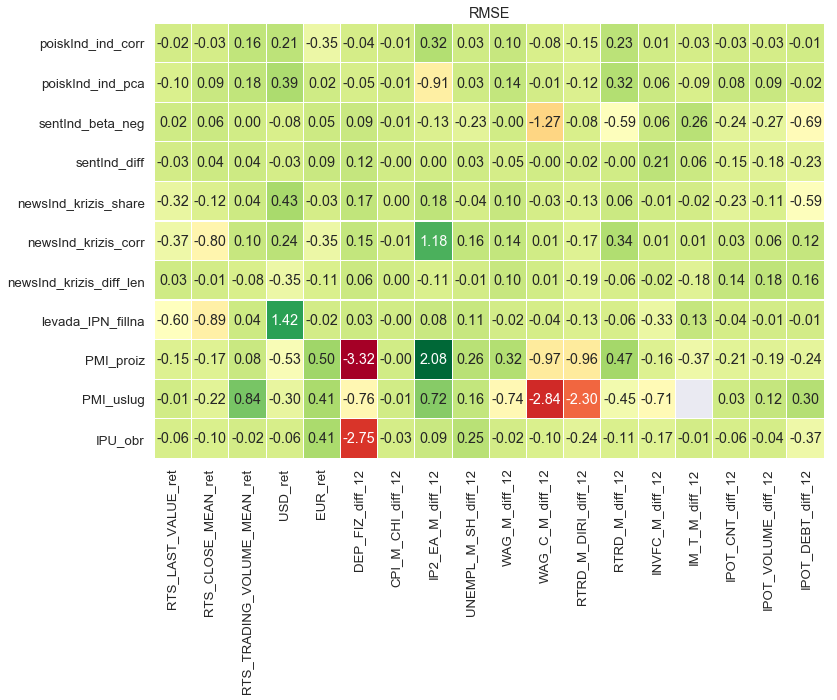

In [67]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')

# chart.set_xticklabels(rotation=90, labels=targets_1[:-4])
# chart.set_yticklabels(rotation=0, labels=indexes_1)
plt.title('RMSE');

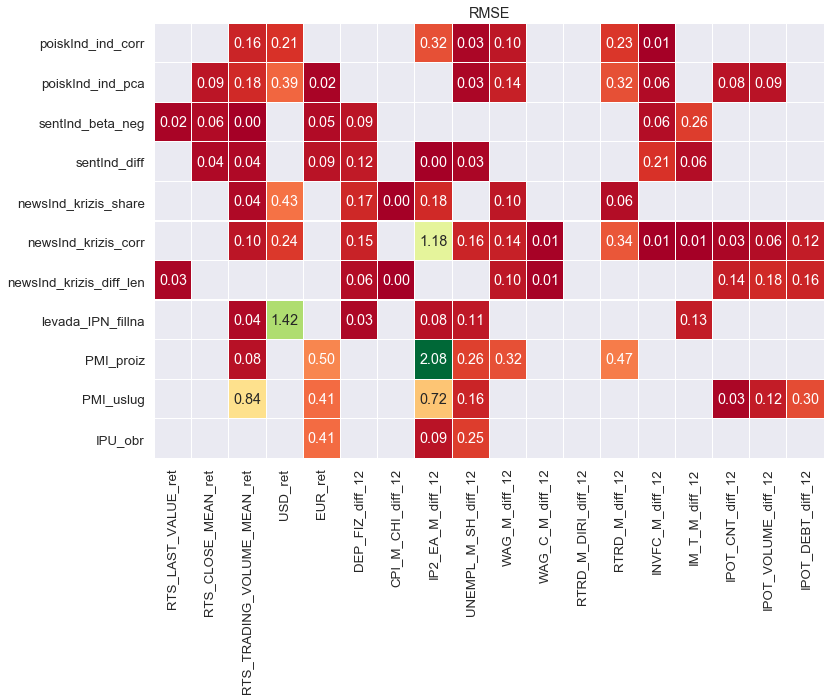

In [68]:
MMM_g = MMM.copy()
MMM_g[MMM_g < 0] = None

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
chart = sns.heatmap(MMM_g, cbar=False, annot=True, 
            fmt=".2f", linewidths=0.1, cmap='RdYlGn')
plt.title('RMSE');

In [69]:
np.nan_to_num(MMM_g).mean()

0.08411221115719426

In [64]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) # RMSE

newsInd_krizis_corr        0.154795
poiskInd_ind_corr          0.060788
levada_IPN_fillna         -0.020516
newsInd_krizis_diff_len   -0.033208
newsInd_krizis_share      -0.033550
sentInd_diff              -0.054057
PMI_proiz                 -0.088267
poiskInd_ind_pca          -0.131186
IPU_obr                   -0.156571
sentInd_beta_neg          -0.216285
PMI_uslug                 -0.724617
dtype: float64

In [70]:
MMM.fillna(0).mean(axis=1).sort_values(ascending=False) #MAE

newsInd_krizis_corr        0.046161
poiskInd_ind_corr          0.015581
poiskInd_ind_pca           0.005248
sentInd_diff              -0.005615
levada_IPN_fillna         -0.019529
newsInd_krizis_diff_len   -0.024598
newsInd_krizis_share      -0.035610
sentInd_beta_neg          -0.169424
IPU_obr                   -0.188006
PMI_proiz                 -0.198001
PMI_uslug                 -0.319033
dtype: float64

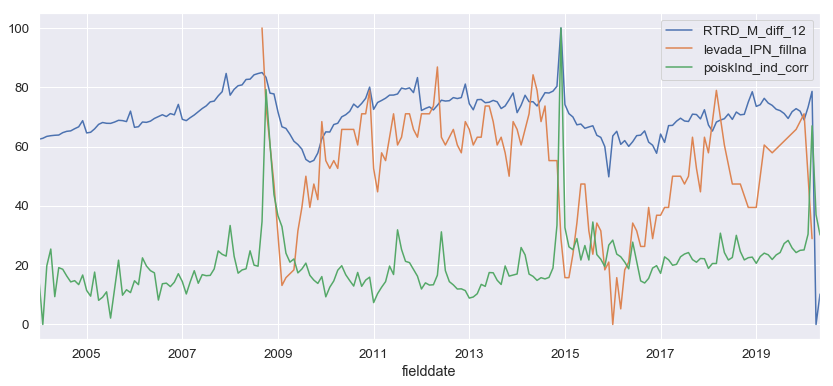

In [71]:
col = [
    'RTRD_M_diff_12',
    'levada_IPN_fillna',
    #'WAG_M_diff_12', 
    #'IM_T_M_diff_12',
    #'CPI_M_CHI_diff_12',
    #'UNEMPL_M_SH_diff_12',
    'poiskInd_ind_corr'
]

dff[col].plot(legend=True, figsize=(14,6));

-------------

__Дебаг__ 

In [72]:
dff.columns

Index(['poiskInd_ind_corr', 'poiskInd_ind_pca', 'sentInd_beta_neg',
       'sentInd_diff', 'newsInd_krizis_share', 'newsInd_krizis_corr',
       'newsInd_krizis_diff_len', 'levada_IPN_fillna', 'PMI_proiz',
       'PMI_uslug', 'IPU_obr', 'RTS_LAST_VALUE_ret', 'RTS_CLOSE_MEAN_ret',
       'RTS_TRADING_VOLUME_MEAN_ret', 'USD_ret', 'EUR_ret', 'DEP_FIZ_diff_12',
       'CPI_M_CHI_diff_12', 'IP2_EA_M_diff_12', 'UNEMPL_M_SH_diff_12',
       'WAG_M_diff_12', 'WAG_C_M_diff_12', 'RTRD_M_DIRI_diff_12',
       'RTRD_M_diff_12', 'INVFC_M_diff_12', 'IM_T_M_diff_12',
       'IPOT_CNT_diff_12', 'IPOT_VOLUME_diff_12', 'IPOT_DEBT_diff_12'],
      dtype='object')

In [73]:
target = 'RTS_LAST_VALUE_ret'
index = 'poiskInd_ind_corr'
#index = 'levada_IPN_fillna'

df_cp = dff[[target, index]].copy().dropna()
print(df_cp.shape)
df_cp.head()

(197, 2)


,RTS_LAST_VALUE_ret,poiskInd_ind_corr
fielddate,,
2004-01-01,62.166656,15.679730
2004-02-01,64.124509,0.000000
2004-03-01,67.150867,19.770509
2004-04-01,40.848102,25.436467
2004-05-01,50.065090,9.381211


In [74]:
x = df_cp[index].values[:-1]
y = df_cp[target].values[1:]

x[:5], y[:5]

(array([15.67972961,  0.        , 19.77050927, 25.4364665 ,  9.3812105 ]),
 array([64.1245086 , 67.15086679, 40.84810208, 50.0650899 , 56.80479474]))

AIC: 1238.6068657363287


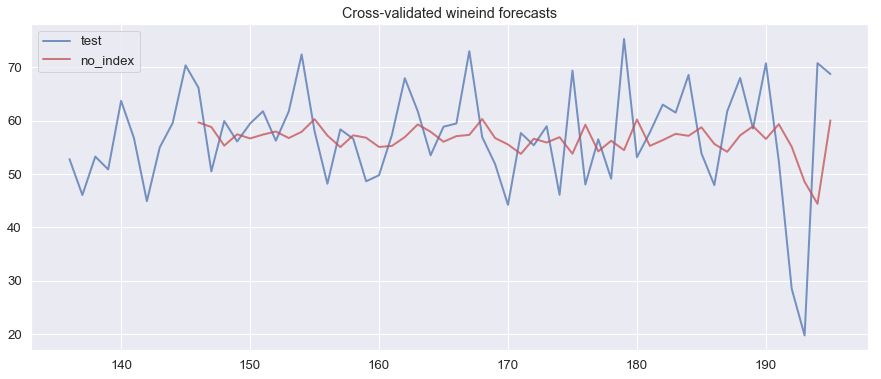

In [76]:
model, pred, ls = fit_arima(y, test_per=int(0.25*(y.size) + 1), verbouse=True)

In [77]:
model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

AIC: 1462.8793558243497


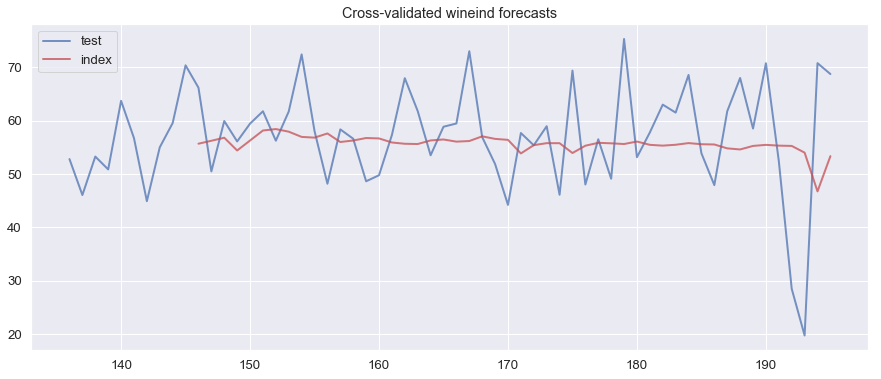

In [80]:
model_e, pred, ls = fit_arima_exo(y, x, test_per=int(0.25*(y.size) + 1), verbouse=True)

In [81]:
model_e

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)